<h1>라이브러리 임포트
<h4>koreanize-matplotlib 라이브러리: matplotlib 한글폰트 설정 라이브러리
<h4>        pip install koreanize-matplotlib

In [1]:
import numpy as np  # 수치 계산
import pandas as pd # 데이터프레임 처리
import matplotlib.pyplot as plt # 시각화
import koreanize_matplotlib # 한글 폰트 설정


pd.options.display.float_format = '{:.2f}'.format


<h1> 파일을 읽어 데이터프레임으로 변환
<h4> csv파일을 읽어 데이터프레임으로 변환

In [2]:
file_path = 'C:/Users/USER/Downloads/국민건강보험공단_건강검진정보_2023.CSV'

df = pd.read_csv(file_path, encoding='euc-kr')  # 또는 cp949, euc-kr

# 데이터프레임 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

In [3]:
# 데이터의 양이 많으므로 일부데이터만 사용
# sample() 함수를 사용하여 1%만 랜덤 추출하고 인덱스 재설정
# random_state는 재현성을 위한 시드값
df = df.sample(frac=0.01, random_state=999).reset_index(drop=True)

# 데이터프레임 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   기준년도           10000 non-null  int64  
 1   가입자일련번호        10000 non-null  int64  
 2   시도코드           10000 non-null  int64  
 3   성별코드           10000 non-null  int64  
 4   연령대코드(5세단위)    10000 non-null  int64  
 5   신장(5cm단위)      10000 non-null  int64  
 6   체중(5kg단위)      10000 non-null  int64  
 7   허리둘레           9995 non-null   float64
 8   시력(좌)          9997 non-null   float64
 9   시력(우)          9997 non-null   float64
 10  청력(좌)          9996 non-null   float64
 11  청력(우)          9996 non-null   float64
 12  수축기혈압          9949 non-null   float64
 13  이완기혈압          9949 non-null   float64
 14  식전혈당(공복혈당)     9949 non-null   float64
 15  총콜레스테롤         3403 non-null   float64
 16  트리글리세라이드       3403 non-null   float64
 17  HDL콜레스테롤       3403 non-null   float64
 18  LDL콜레스테

<h1>데이터프레임 확인

In [4]:
df.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,1562432,41,2,7,170,70,76.00,1.00,1.00,...,12.00,14.00,1.00,1.00,0,NaN,NaN,NaN,NaN,NaN
1,2023,3159803,44,1,6,180,95,99.00,0.90,1.50,...,62.00,66.00,3.00,1.00,1,1.00,NaN,NaN,NaN,1.00
2,2023,2078197,47,2,14,155,50,74.00,1.00,0.90,...,20.00,46.00,1.00,0.00,0,NaN,NaN,NaN,NaN,NaN
3,2023,2795866,44,2,13,150,60,88.00,0.60,0.50,...,31.00,33.00,1.00,0.00,1,1.00,NaN,NaN,NaN,0.00
4,2023,4174700,28,1,17,160,55,76.00,0.80,0.50,...,14.00,76.00,3.00,0.00,0,NaN,NaN,NaN,NaN,NaN


<h1>데이터 전처리
<h4>데이터를 분석하기 좋은 형태로 가공하는 단계
<h2>불필요한 컬럼제거
<h4>분석에 필요한 컬럼을 선택하고 불필요한 컬럼은 제거

In [5]:
# 분석에 사용하는 컬럼
used_cols = ['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압', '이완기혈압', '흡연상태', '음주여부', '혈청지피티(ALT)']

# 사용하는 컬럼만 추출
df = df[used_cols]

# 앞 5개 데이터 출력
df.head()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,흡연상태,음주여부,혈청지피티(ALT)
0,2,7,170,70,76.00,138.00,93.00,1.00,1.00,12.00
1,1,6,180,95,99.00,139.00,81.00,3.00,1.00,62.00
2,2,14,155,50,74.00,100.00,60.00,1.00,0.00,20.00
3,2,13,150,60,88.00,130.00,80.00,1.00,0.00,31.00
4,1,17,160,55,76.00,132.00,76.00,3.00,0.00,14.00


<h1>결측치 처리
<h4>결측치 확인

In [6]:
# 결측치 여부를 환인하여 컬럼별로 결측치(True=1)를 합산
df.isnull().sum()

성별코드            0
연령대코드(5세단위)     0
신장(5cm단위)       0
체중(5kg단위)       0
허리둘레            5
수축기혈압          51
이완기혈압          51
흡연상태            3
음주여부            0
혈청지피티(ALT)     51
dtype: int64

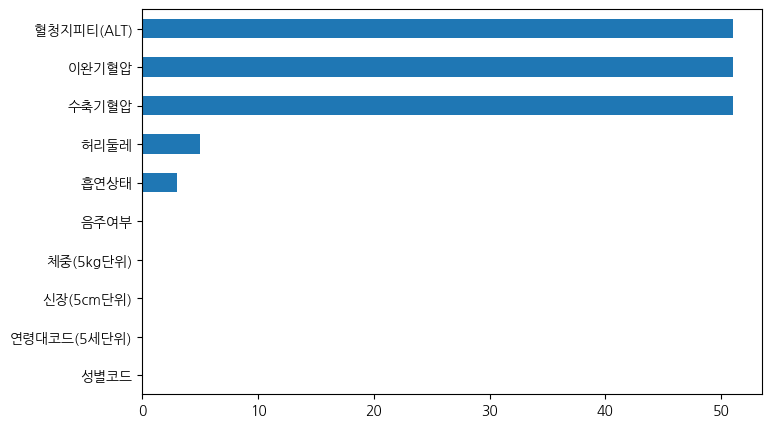

In [7]:
# 컬럼별 결측치 개수를 정렬하고 바 그래프로 시각화
df.isnull().sum().sort_values().plot(kind='barh', figsize=(8, 5));

<h1>결측치 제거
<h4>결측치가 있는 행을 제거하거나 다른 값으로 대체하는 방법을 사용할 수 있음
<h4>dropna(): 결측치가 있는 행 또는 컬럼을 제거
<h4>axis=0: 행 제거, axis=1: 열 제거
<h4>thresh: 결측치가 n개 이상인 행 또는 열을 제거

In [8]:
# 결측치가 10% 이상(데이터가 90% 이하)인 컬럼을 삭제
df = df.dropna(thresh=len(df)*0.9, axis=1)
df.head()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,흡연상태,음주여부,혈청지피티(ALT)
0,2,7,170,70,76.00,138.00,93.00,1.00,1.00,12.00
1,1,6,180,95,99.00,139.00,81.00,3.00,1.00,62.00
2,2,14,155,50,74.00,100.00,60.00,1.00,0.00,20.00
3,2,13,150,60,88.00,130.00,80.00,1.00,0.00,31.00
4,1,17,160,55,76.00,132.00,76.00,3.00,0.00,14.00


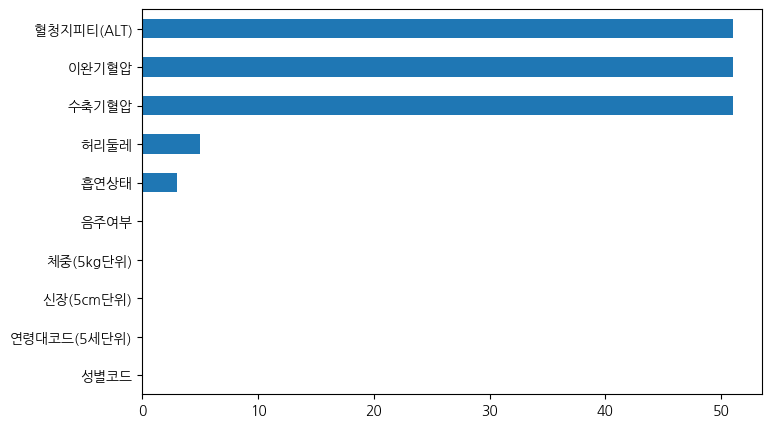

In [9]:
# 컬럼별 결측치 개수를 정렬하고 바 그래프로 시각화
df.isnull().sum().sort_values().plot(kind='barh', figsize=(8, 5));

In [10]:
# 결측치가 많은 1개 컬럼명 추출
missing_col_names_top1 = df.isnull().sum().sort_values(ascending=False).iloc[:1].index
print(f'{missing_col_names_top1 = }')

missing_col_names_top1 = Index(['이완기혈압'], dtype='object')


In [11]:
# 결측치가 가장 많은 컬럼에 결측치가 있는 행을 삭제
df = df.dropna(subset=missing_col_names_top1)
df.head()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,흡연상태,음주여부,혈청지피티(ALT)
0,2,7,170,70,76.00,138.00,93.00,1.00,1.00,12.00
1,1,6,180,95,99.00,139.00,81.00,3.00,1.00,62.00
2,2,14,155,50,74.00,100.00,60.00,1.00,0.00,20.00
3,2,13,150,60,88.00,130.00,80.00,1.00,0.00,31.00
4,1,17,160,55,76.00,132.00,76.00,3.00,0.00,14.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9949 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   성별코드         9949 non-null   int64  
 1   연령대코드(5세단위)  9949 non-null   int64  
 2   신장(5cm단위)    9949 non-null   int64  
 3   체중(5kg단위)    9949 non-null   int64  
 4   허리둘레         9944 non-null   float64
 5   수축기혈압        9949 non-null   float64
 6   이완기혈압        9949 non-null   float64
 7   흡연상태         9946 non-null   float64
 8   음주여부         9949 non-null   float64
 9   혈청지피티(ALT)   9949 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 855.0 KB


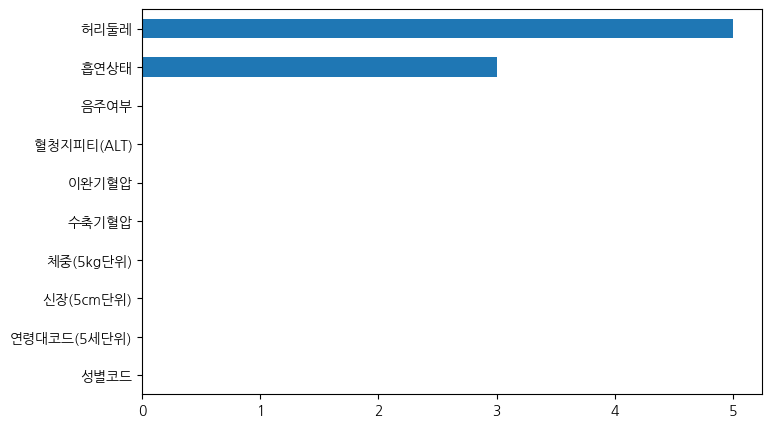

In [13]:
# 컬럼별 결측치 개수를 정렬하고 바 그래프로 시각화
df.isnull().sum().sort_values().plot(kind='barh', figsize=(8, 5));

<h1>결측치 대채
<h4>남아있는 결측치를 평균, 중앙값, 최빈값 등으로 대체
<h4>수치형인 '허리둘레'의 결측치는 평균값으로 대체
<h4>범주형인 '흡연상태'의 결측치는 최빈값으로 대체

In [14]:
# 허리둘레열은 평균값으로 대체
df['허리둘레'] = df['허리둘레'].fillna(df['허리둘레'].mean())

# 흡연상태열은 최빈값으로 대체
df["흡연상태"] = df['흡연상태'].fillna(df['흡연상태'].mode()[0])

# 결축치가 있는지 확인
df.isnull().sum()

성별코드           0
연령대코드(5세단위)    0
신장(5cm단위)      0
체중(5kg단위)      0
허리둘레           0
수축기혈압          0
이완기혈압          0
흡연상태           0
음주여부           0
혈청지피티(ALT)     0
dtype: int64

<h1>이상치 처리
<h4>·이상치(Outlier)를 확인하고 제거하거나 대체하는 작업
<h4>·이상치: 대부분의 값과는 다른 패턴을 보이는 값
<h4>·박스플롯(Boxplot)을 사용하여 이상치를 확인


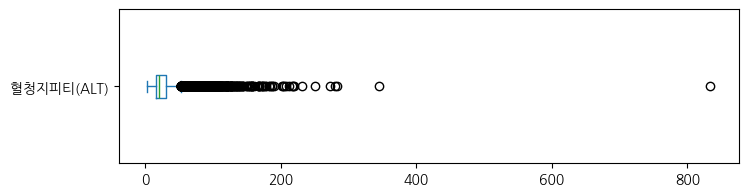

In [15]:
# 박스플롯으로 이상치 확인
df['혈청지피티(ALT)'].plot(
    kind='box',     # 상자그림
    vert=False,     # 가로 방향으로 그리기
    figsize=(8, 2)  # 그래프 크기     
);

<Axes: >

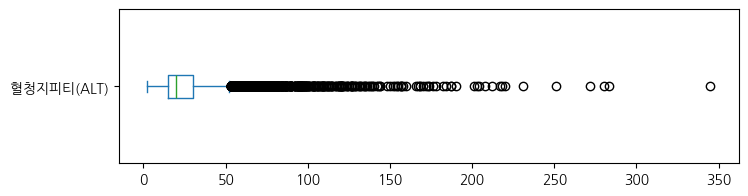

In [16]:
# 혈청지피티(ALT) 열의 이상치를 제거 (400 이상인 값 제거)
df = df[df['혈청지피티(ALT)'] < 400]

# 박스플롯으로 이상치 확인
df['혈청지피티(ALT)'].plot(
    kind='box',     # 상자그림
    vert=False,     # 가로 방향으로 그리기
    figsize=(8, 2)  # 그래프 크기 
)

<h1>탐색적 데이터 분석
<h4>탐색적데이터 분석은 데이터를 분석하기 전에 데이터의 특성을 파악하는 과정

<h1>수치형 데이터와 범주형 데이터 구분

In [17]:
# 전체 컬럼명
col_all = df.columns
print(f'{col_all = }')

col_all = Index(['성별코드', '연령대코드(5세단위)', '신장(5cm단위)', '체중(5kg단위)', '허리둘레', '수축기혈압',
       '이완기혈압', '흡연상태', '음주여부', '혈청지피티(ALT)'],
      dtype='object')


In [18]:
# 범주형 컬럼명
col_cat = ['성별코드', '흠연상태', '음주여부']
print(f'{col_cat = }')


col_cat = ['성별코드', '흠연상태', '음주여부']


In [19]:
# 수치형 컬럼명
col_num = list(set(col_all) - set(col_cat))
print(f'{col_num = }')

col_num = ['수축기혈압', '체중(5kg단위)', '신장(5cm단위)', '이완기혈압', '연령대코드(5세단위)', '흡연상태', '혈청지피티(ALT)', '허리둘레']


<h1>수치형 데이터의 기술 통계량 확인

In [20]:
#수치형 데이터 요약 통계량
df[col_num].describe()

,수축기혈압,체중(5kg단위),신장(5cm단위),이완기혈압,연령대코드(5세단위),흡연상태,혈청지피티(ALT),허리둘레
count,9948.00,9948.00,9948.00,9948.00,9948.00,9948.00,9948.00,9948.00
mean,122.68,64.39,162.66,75.22,10.55,1.54,26.13,81.34
std,14.53,13.88,9.26,10.35,3.03,0.79,20.61,10.70
min,78.00,30.00,130.00,42.00,5.00,1.00,2.00,52.00
25%,112.00,55.00,155.00,68.00,8.00,1.00,15.00,74.00
50%,121.00,65.00,165.00,75.00,11.00,1.00,20.00,81.00
75%,132.00,75.00,170.00,81.00,13.00,2.00,30.00,88.10
max,203.00,135.00,195.00,128.00,18.00,3.00,345.00,129.90


<h1>피쳐간 상관관계 분석 및 시각화

In [21]:
#피쳐들의 상관계수 계산
corr = df[col_num].corr()
display(corr)

,수축기혈압,체중(5kg단위),신장(5cm단위),이완기혈압,연령대코드(5세단위),흡연상태,혈청지피티(ALT),허리둘레
수축기혈압,1.00,0.27,0.05,0.71,0.29,0.08,0.15,0.36
체중(5kg단위),0.27,1.00,0.66,0.31,-0.17,0.33,0.37,0.82
신장(5cm단위),0.05,0.66,1.00,0.15,-0.35,0.41,0.20,0.36
이완기혈압,0.71,0.31,0.15,1.00,0.09,0.14,0.19,0.32
연령대코드(5세단위),0.29,-0.17,-0.35,0.09,1.00,-0.08,-0.01,0.16
흡연상태,0.08,0.33,0.41,0.14,-0.08,1.00,0.16,0.26
혈청지피티(ALT),0.15,0.37,0.20,0.19,-0.01,0.16,1.00,0.36
허리둘레,0.36,0.82,0.36,0.32,0.16,0.26,0.36,1.00


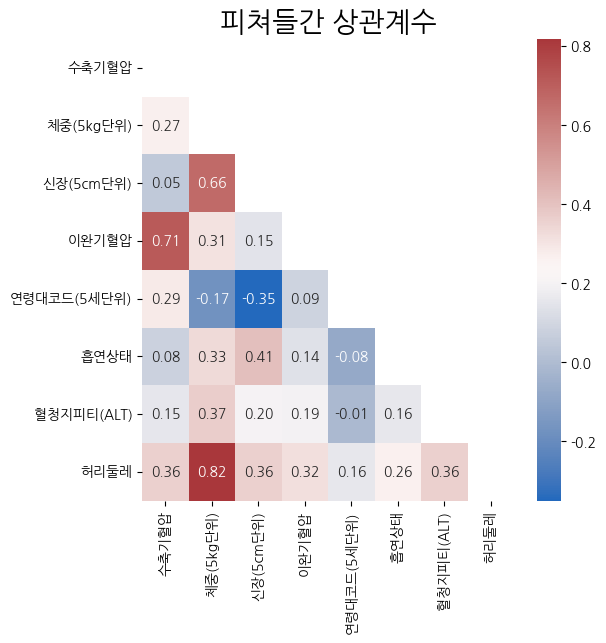

In [22]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
import numpy as np

# figure의 크기를 설정
plt.figure(figsize = (6, 6))

# 우상단 삼각형 마스크 생성
mask = np.triu(np.ones_like(corr, dtype = bool))

# 히트맵 생성
sns.heatmap(
    corr,           #상관계수데이터
    mask=mask,     # 마스크를 적용하여 우상단 삼각형을 가림
    annot = True,   # 수치를 나타내기
    fmt = ".2f",    # 수치를 소수점 둘째자리까지 표시
    cmap="vlag"     # 컬러맵
)

# 히트맵 제목
plt.title('피쳐들간 상관계수', fontsize=20)

# 히트맵 출력
plt.show()


<h4>:::{.callout-note title="결과해석"}
<h4>혈청지피티(ALT)와 다른 수치형 데이터 사이에는 강한 상관관계(0.7이상)는 없음:::

<h1>피쳐간 상관관계 시각화

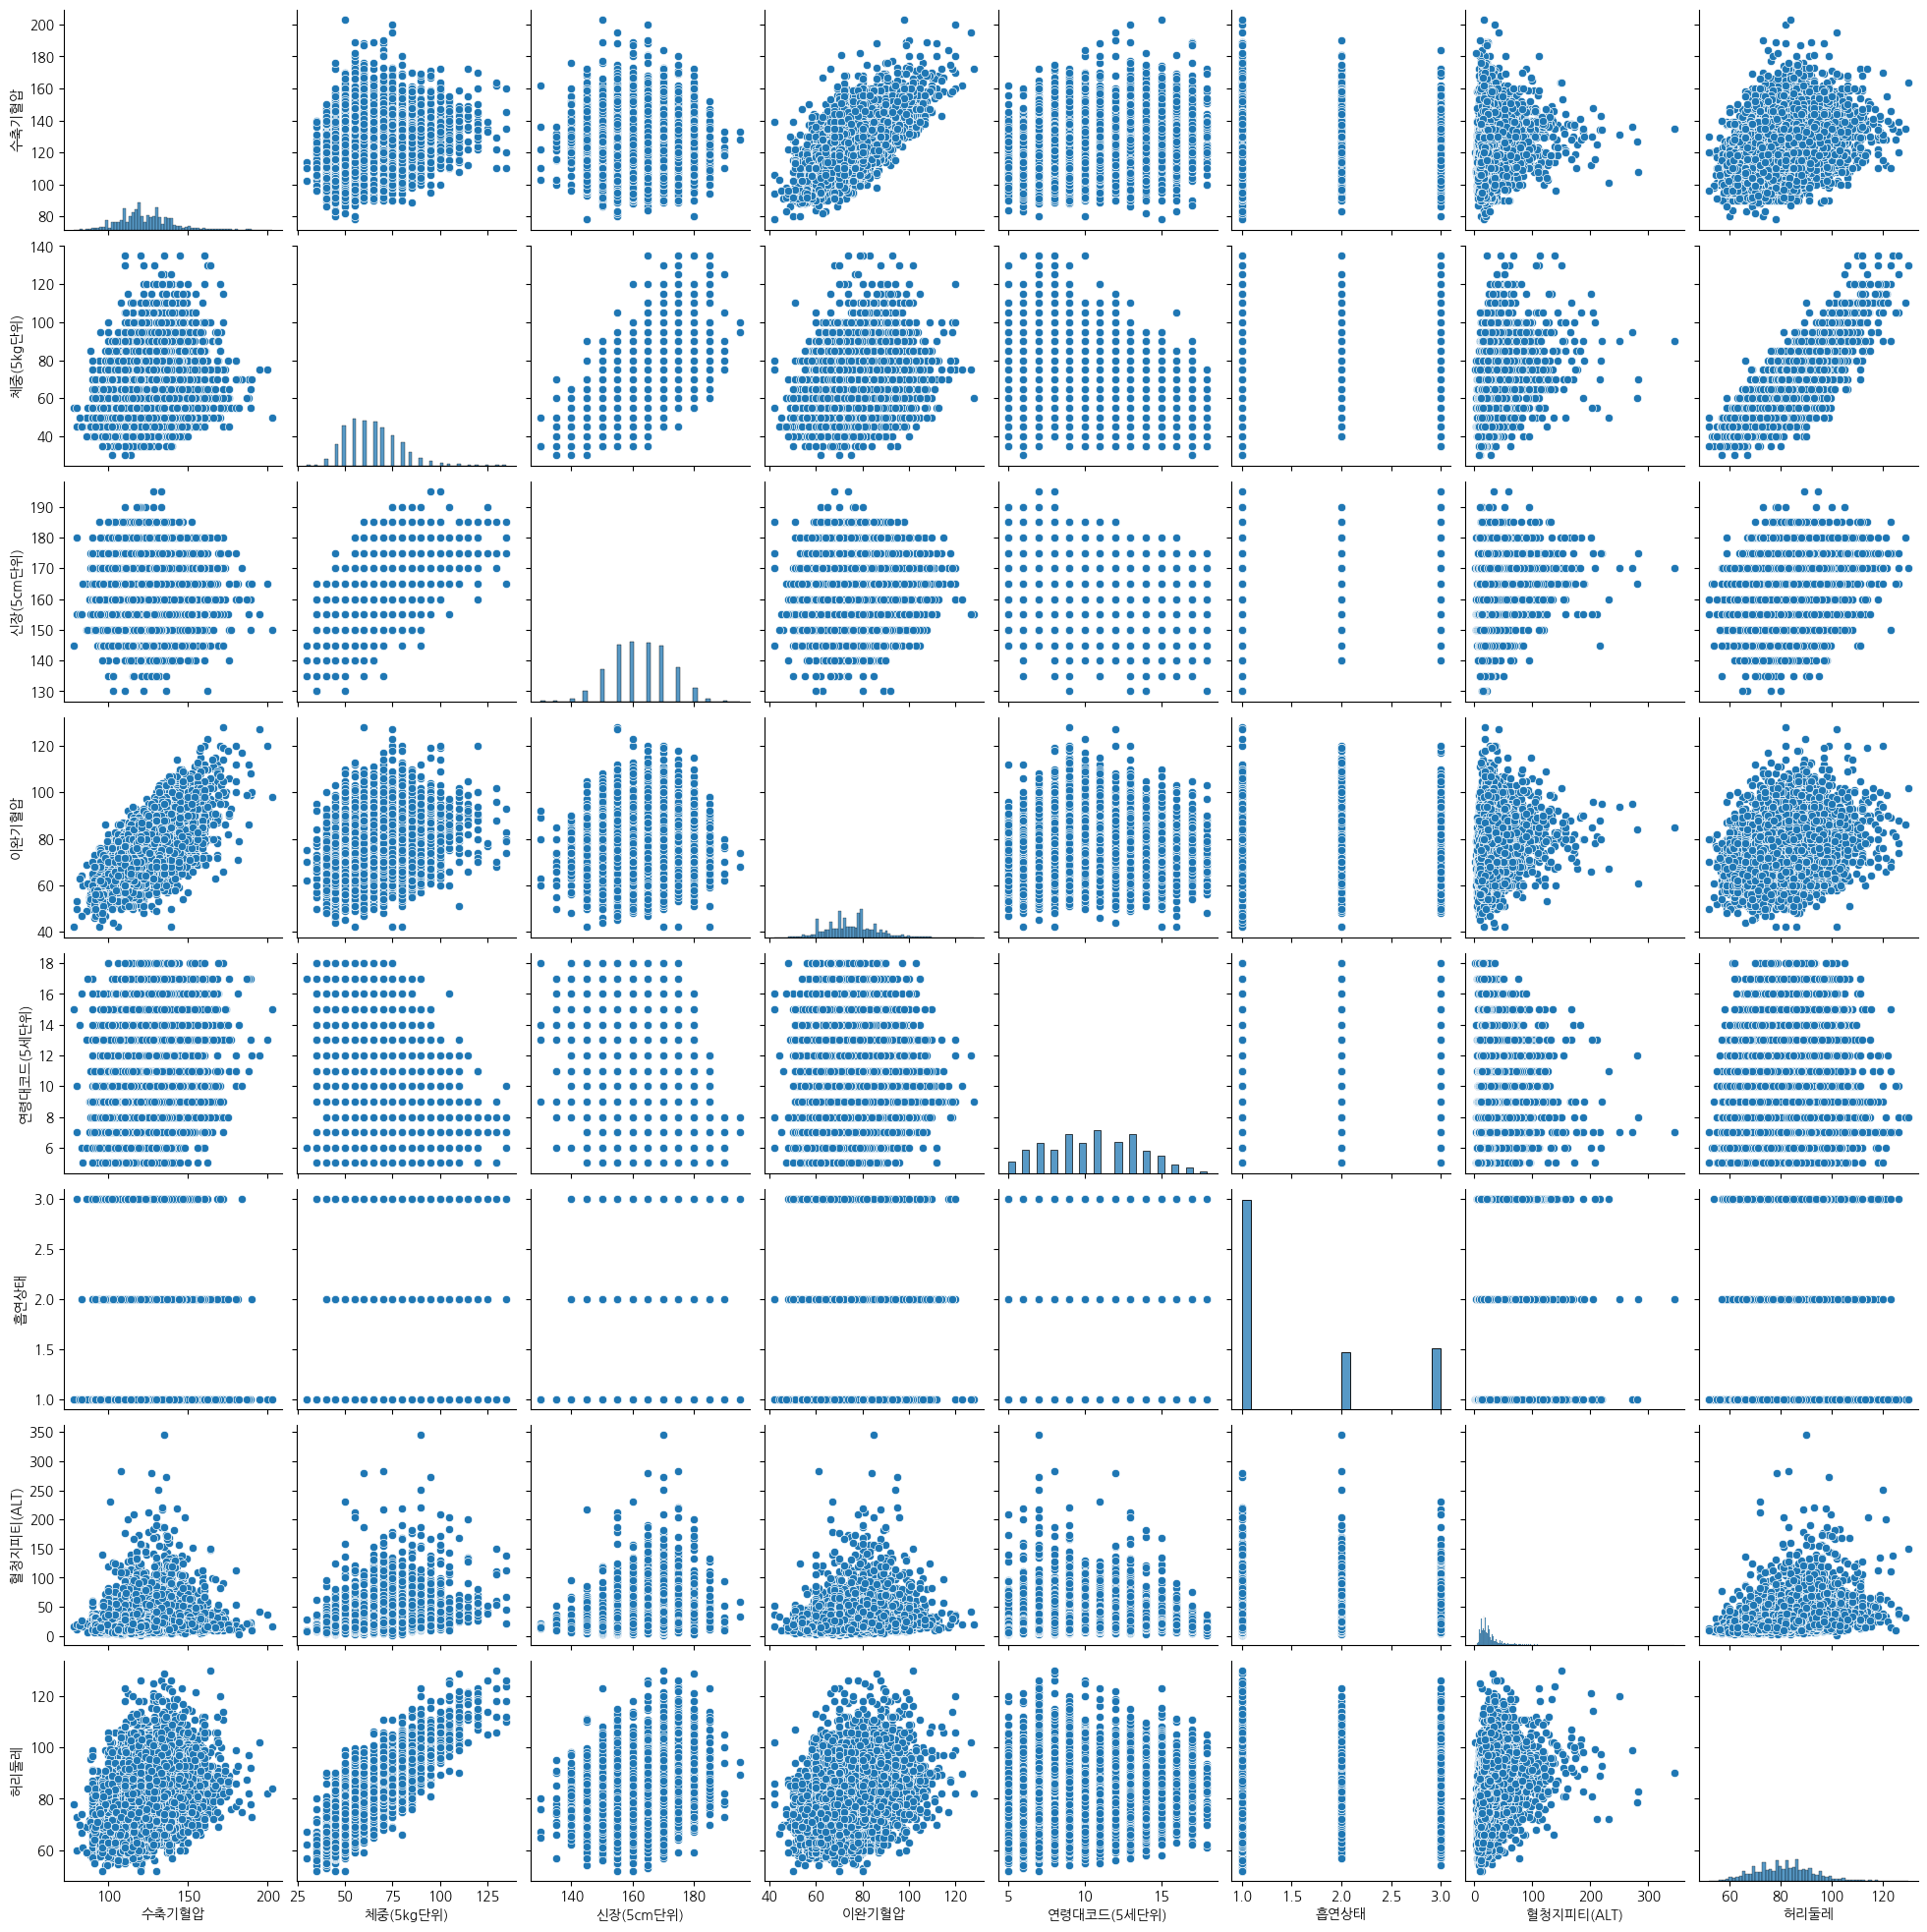

In [23]:
# 산점도 매트릭스 그리기
sns.pairplot(df[col_num]);

In [24]:
df.head()

,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,수축기혈압,이완기혈압,흡연상태,음주여부,혈청지피티(ALT)
0,2,7,170,70,76.00,138.00,93.00,1.00,1.00,12.00
1,1,6,180,95,99.00,139.00,81.00,3.00,1.00,62.00
2,2,14,155,50,74.00,100.00,60.00,1.00,0.00,20.00
3,2,13,150,60,88.00,130.00,80.00,1.00,0.00,31.00
4,1,17,160,55,76.00,132.00,76.00,3.00,0.00,14.00


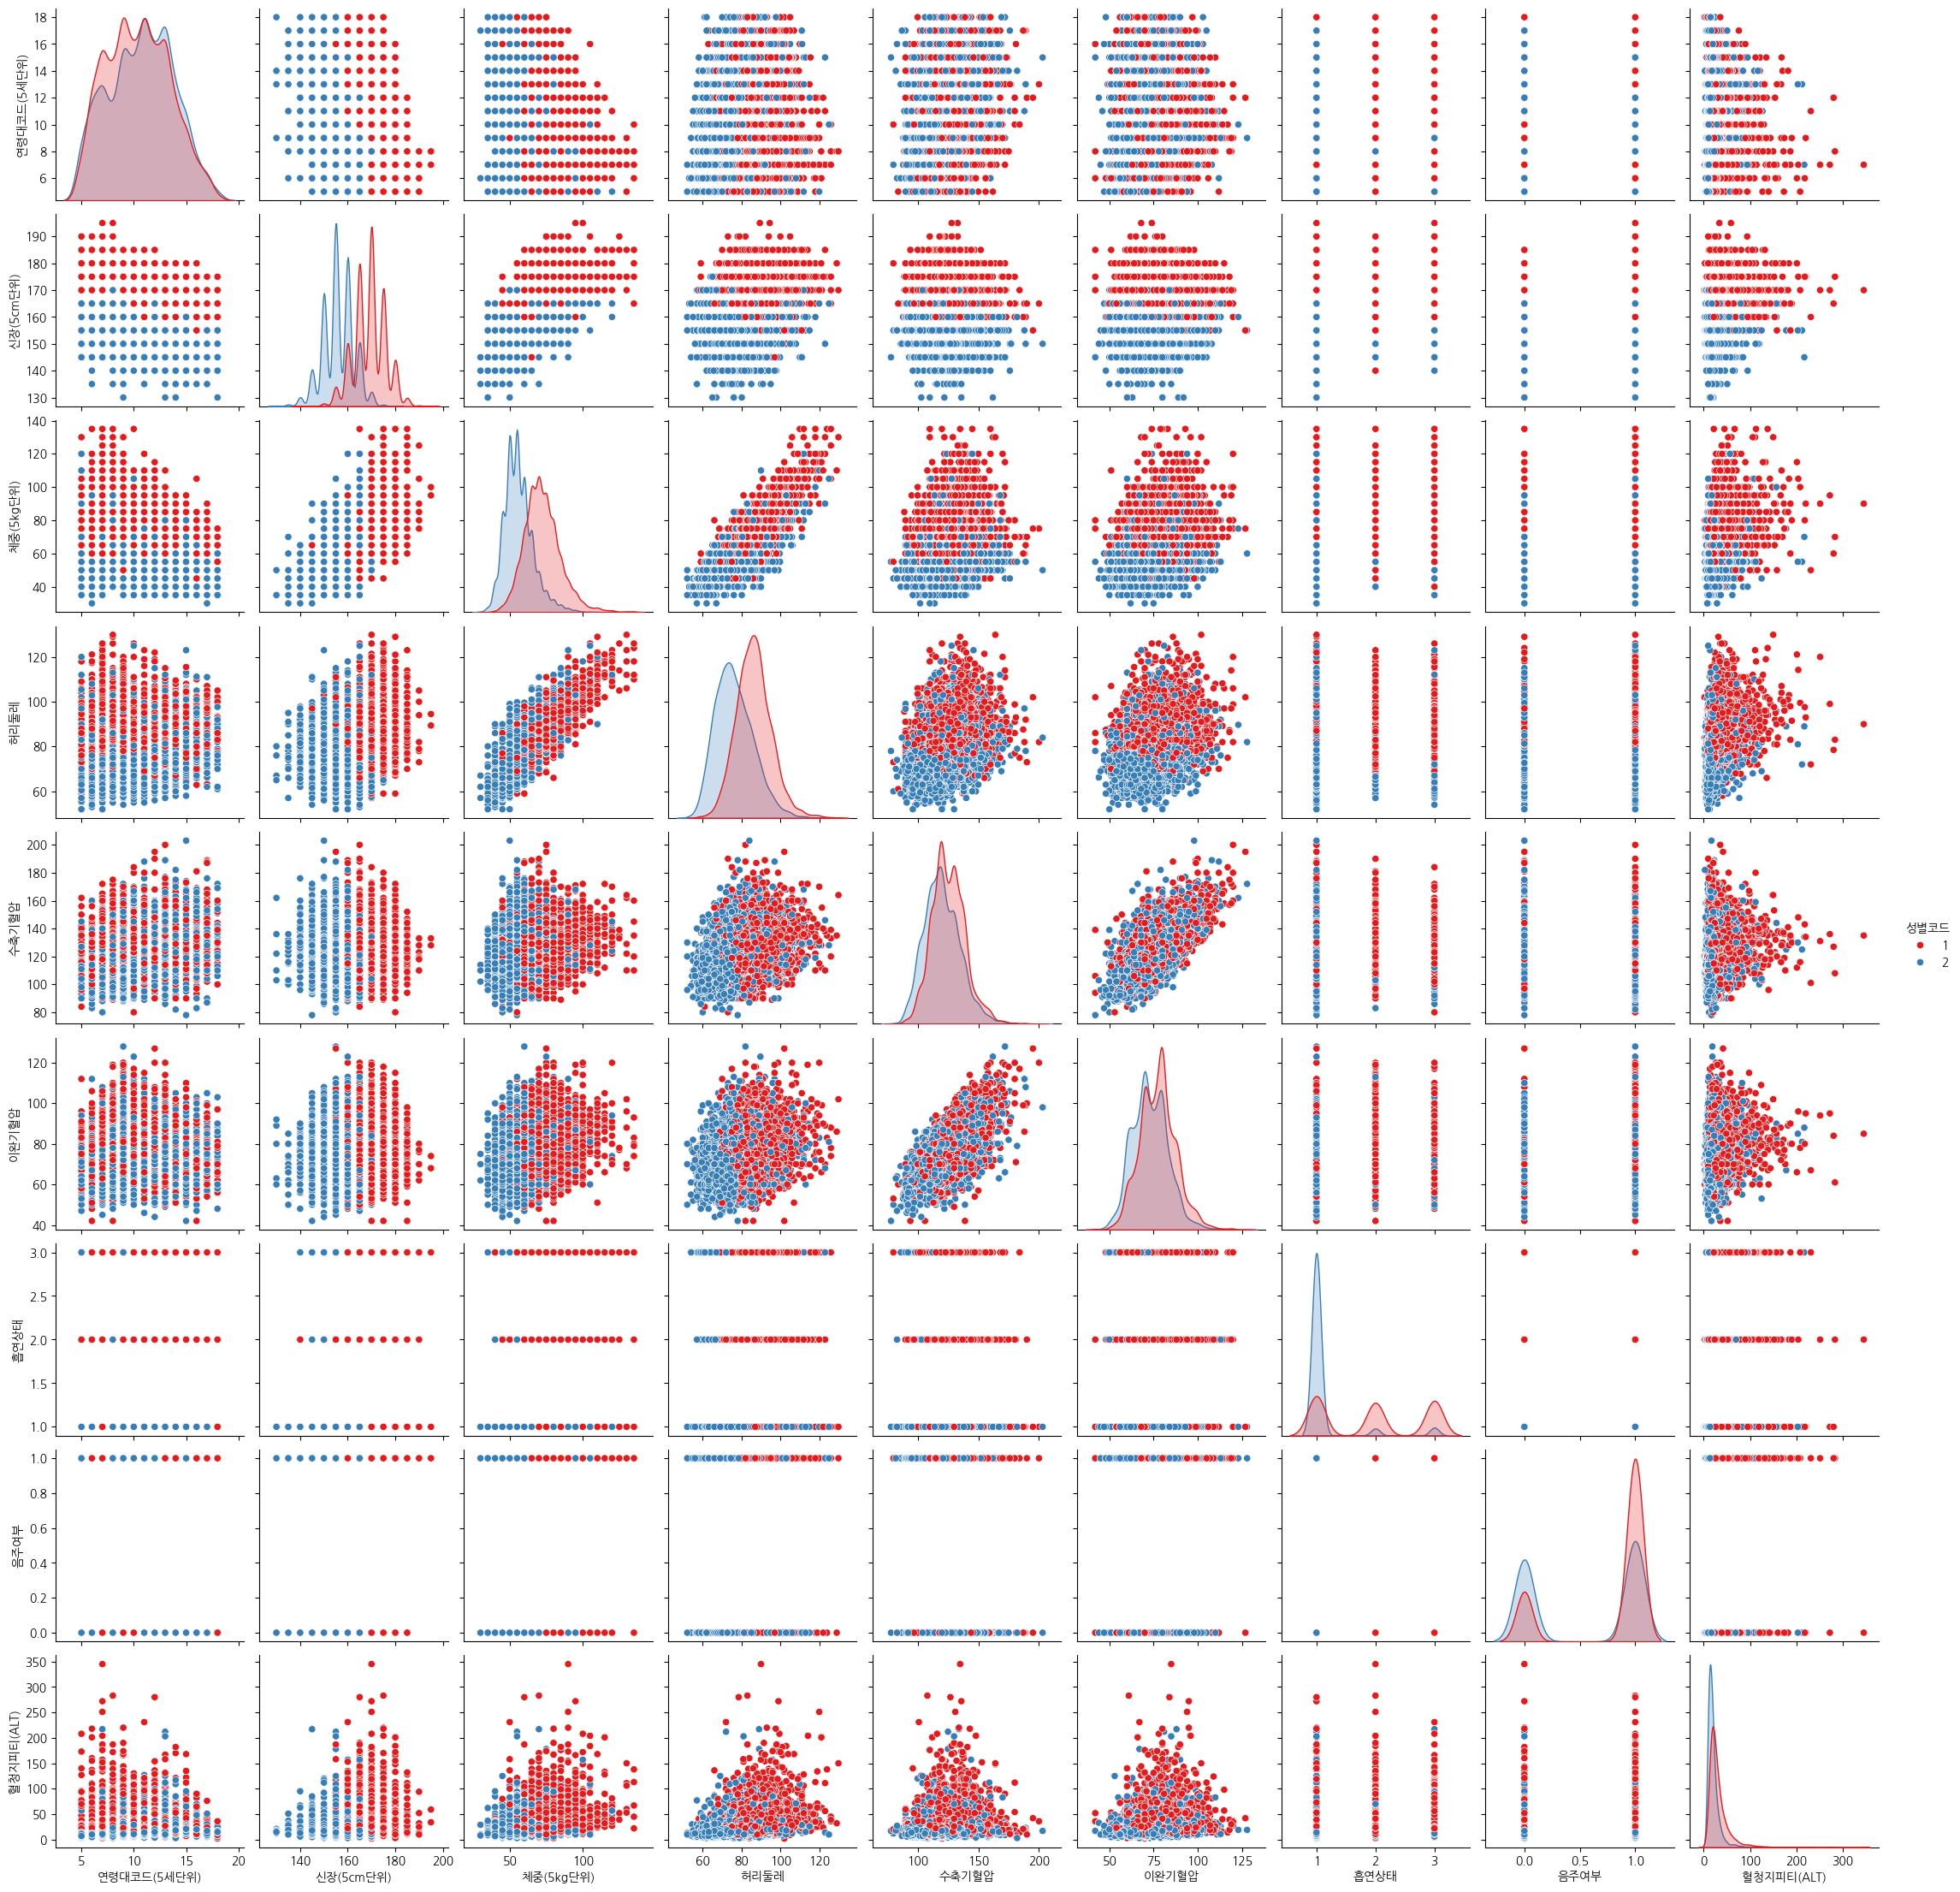

In [25]:
sns.pairplot(
    df,
    hue='성별코드',
    palette='Set1'
);

<h4>:::{callout-note title='결과해석'}
<h4>혈청지피티(ALT)와 다른 수치형 데이터 사이에는 특별한 관계는 보이지 않음::::

<h1>범주형 데이터에 따른 수치형 데이터 분석
<h1>연령대별/성별 수축기 혈압 차이 분석

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈청지피티(ALT)'>

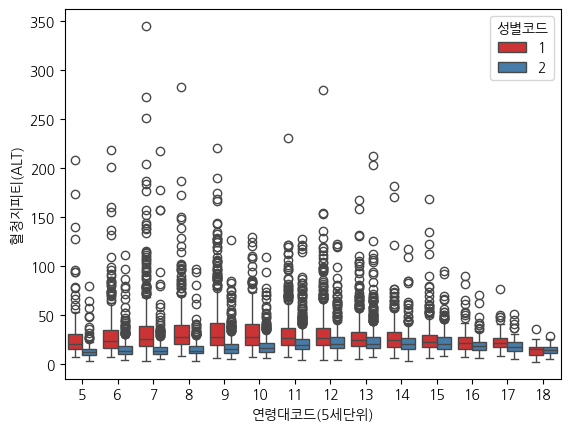

In [26]:
sns.boxplot(
    data=df,                # 데이터프레임 선택
    x='연령대코드(5세단위)', # x축 데이터. 1:0~4세, 2:5~9세, .... ,18~85세 이상
    y='혈청지피티(ALT)',     # y축 데이터
    hue='성별코드',         # 색상 구분분 1:남성, 2:여성
    palette='Set1'          # 색상 팔레트
)

<h4>:::{.callout-note title="결과해석"}
<h4>85세 이상을 제외한 모든 연령대에서 남성이 여성보다 혈청지피티(ALT)수치가 높음
<h4>나이가 어린 경우 혈청 지피티(ALT)수치에 이상치가 많이 나타남::::

<h1>성별/흡연여부에 따른 혈청지피티(ALT) 차이 분석

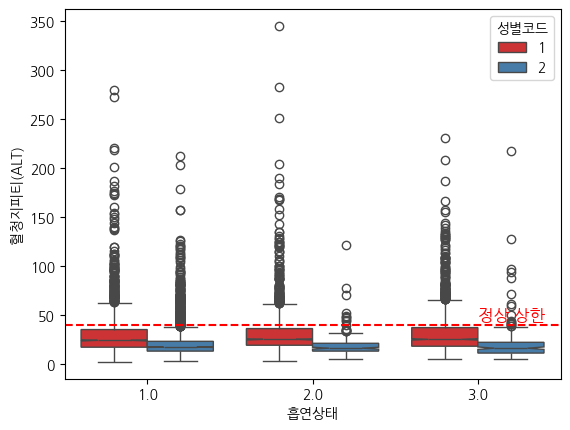

In [27]:
chart = sns.boxplot(
    data=df,
    x="흡연상태",
    y='혈청지피티(ALT)',
    hue='성별코드',
    notch=True,
    palette='Set1'
)

# 수평선 추가, 0~40 IU/L이 정상치
chart.axhline(y=40, color='r', linestyle='--')

# 정상 상한 텍스트 추가
chart.text(2, 45, '정상 상한', color= 'red', fontsize=12)

plt.show()

<h1>음주여부에 따른 혈청지피티(ALT)차이 분석

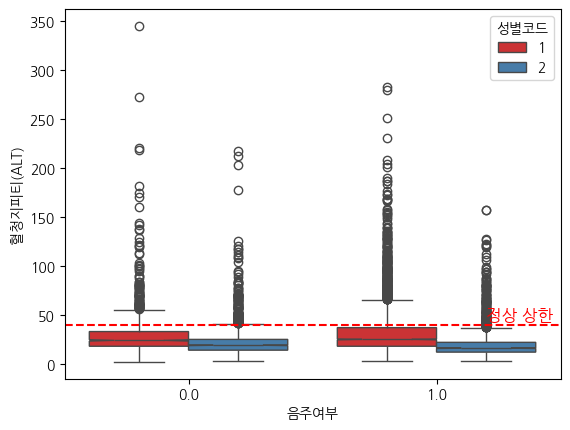

In [28]:
chart = sns.boxplot(
    data=df,
    x="음주여부",
    y='혈청지피티(ALT)',
    hue='성별코드',
    notch=True,
    palette='Set1'
)

# 수평선 추가, 0~40 IU/L이 정상치
chart.axhline(y=40, color='r', linestyle='--')

# 정상 상한 텍스트 추가
chart.text(1.2, 45, '정상 상한', color= 'red', fontsize=12)

plt.show()

<h4>:::{.callout-note title="결과해석"}
<h4>음주는 혈청지피티(ALT)수치에 약간의 영향을 미침
<h4>음주의 경우 혈청지피티(ALT) 수치가 약간 높게 나타남
<h4>음주상태와 관계없이 남성이 여성보다 혈청지피티(ALT) 수치가 높음:::

<h1>성별/음주여부/흡연상태에 따른 혈청지피티(ALT) 차이를 분석

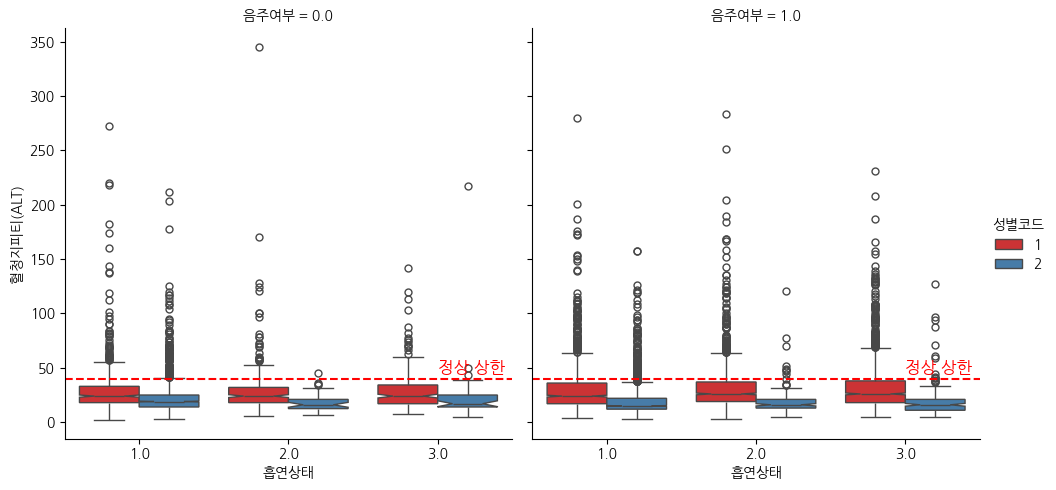

In [29]:
chart = sns.catplot(
    kind='box',
    data=df,
    x='흡연상태',       # 1. 안피운다.  2. 이전에 피웠으니 끊었다.  3. 현재도 피우고 있다.
    y='혈청지피티(ALT)',
    hue='성별코드',     # 1: 남성   2: 여성
    col='음주여부',     # 0: 마시지 않음, 1: 마심
    notch=True,         # 중앙값에 Notch 표시
    palette='Set1',
    height=5,           # 그래프 높이
    aspect=1            # 그래프 종횡비비
)

for ax in chart.axes.flat:      # 모든 서브플롯에 대해 반복
    ax.axhline(y=40, color='r', linestyle='--')     # 수평선 추가, 0~ 40 IU/L이 정상치치
    ax.text(2, 45, '정상 상한', color = 'red', fontsize=12)

plt.show()

<h1> + 연령과 신장대별 흡연 여부

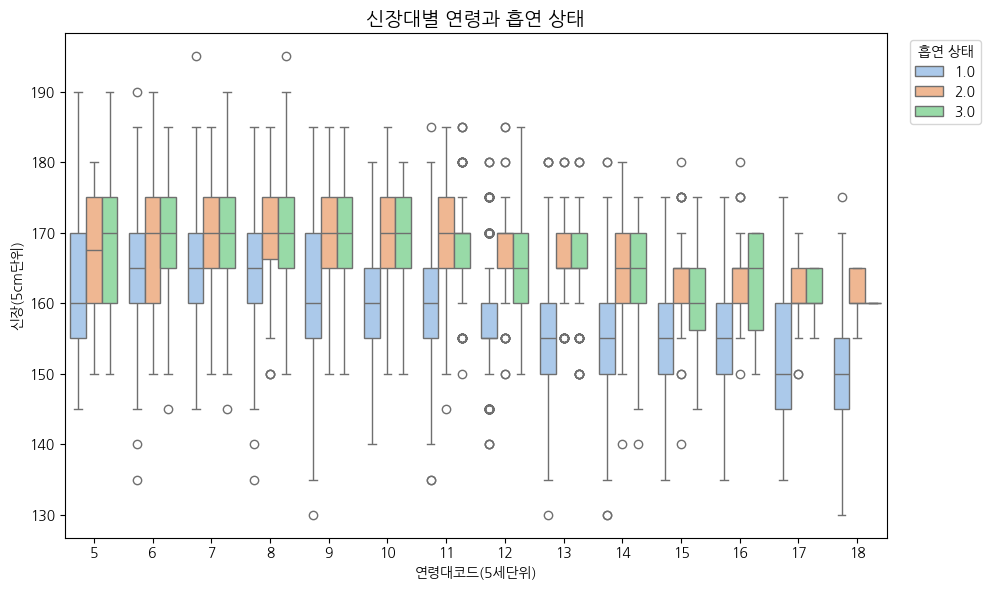

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

df['연령대코드(5세단위)'] = pd.Categorical(df['연령대코드(5세단위)'], ordered=True)

plt.figure(figsize=(10, 6))
chart = sns.boxplot(
    data = df,
    x = '연령대코드(5세단위)',
    y = '신장(5cm단위)',
    hue = '흡연상태',
    palette = 'pastel'
)

plt.title('신장대별 연령과 흡연 상태', fontsize=14)
plt.legend(title='흡연 상태', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

- 연령대와 흡연 여부에 따라 키 분포에 차이가 있는지 확인하기 위해 분석했다. 
- 같은 연령대 내에서도 흡연자와 비흡연자 간의 키 차이 비교가 가능하다.